In [ ]:
4.Use Autoencoder to implement anomaly detection. Build the model by using:
a. Import required libraries

b. Upload / access the dataset

c. Encoder converts it into latent representation

d. Decoder networks convert it back to the original input

e. Compile the models with Optimizer, Loss, and Evaluation Metrics


(60000, 28, 28)
(10000, 28, 28)
Epoch 1/10
1875/1875 [==============================] - 44s 18ms/step - loss: 0.0239 - val_loss: 0.0134
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0118 - val_loss: 0.0107
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0101 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0094 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0088 - val_loss: 0.0090
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==================

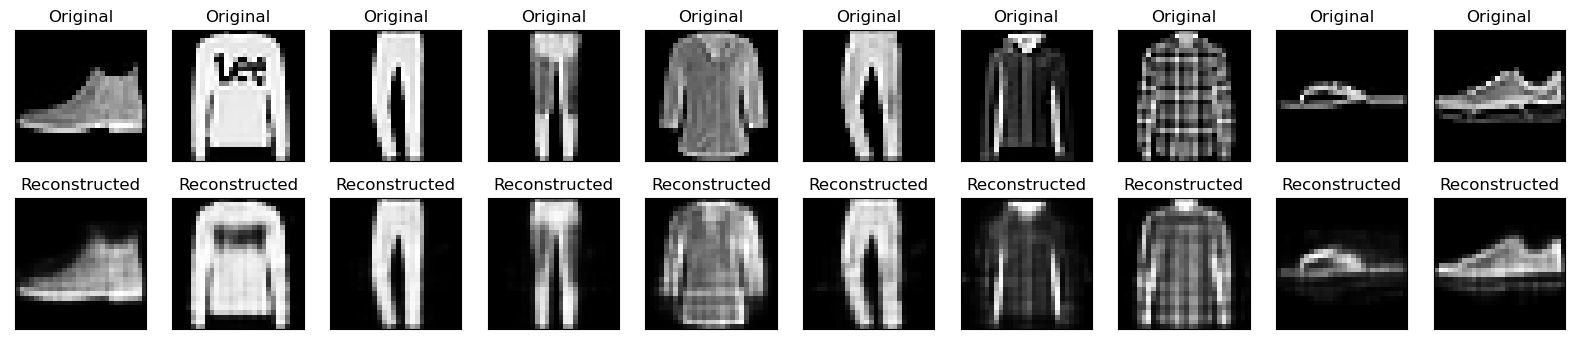

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd #reading
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split                #model Selection and Scaling the data
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

(x_train, _), (x_test, _)= fashion_mnist.load_data()
x_train=x_train/255
x_test=x_test/255
print(x_train.shape)
print(x_test.shape)

latent_dim=64
class Autoencoder(Model):
 def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim=latent_dim
        self.encoder=tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
    ])
        self.decoder=tf.keras.Sequential([
        layers.Dense(784,activation='sigmoid'),
        layers.Reshape((28,28))
    ])
    
 def call(self, x):
        encoded=self.encoder(x)
        decoded=self.decoder(encoded)
        return decoded
    
    
autoencoder= Autoencoder(latent_dim)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder.fit(x_train, x_train,
               epochs=10,
              shuffle=True,
              validation_data=(x_test, x_test))


encoded_imgs=autoencoder.encoder(x_test).numpy()
decoded_imgs=autoencoder.decoder(encoded_imgs).numpy()

n=10
plt.figure(figsize=(20,4))
for i in range(n):
    #display original
    ax=plt.subplot(2, n,i+1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #display reconstruction
    
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
    